In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
# Read in data frame

df_results = pd.read_csv("Resources/results.csv")

In [3]:
#See results of dataframe

df_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,25461,1076,849,3,6,18,16,16,16,0.0,57,\N,\N,49,18,1:23.882,226.518,11
25456,25462,1076,4,214,14,10,17,17,17,0.0,57,\N,\N,57,2,1:20.846,235.024,11
25457,25463,1076,830,9,1,2,\N,R,18,0.0,38,\N,\N,37,6,1:21.677,232.633,9
25458,25464,1076,20,117,5,17,\N,R,19,0.0,22,\N,\N,17,19,1:25.189,223.042,3


In [4]:
""" 
Check all columns that have keyword "Id" 
Check each column that has "ID" in it to see if it's something that repeats or it's unique 
Drop if the Id is the same length as the dataframe 
"""

[i for i in df_results.columns.values if i.find("Id") > 0] 

['resultId', 'raceId', 'driverId', 'constructorId', 'statusId']

In [5]:
# Look for missing values

df_results.isna().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [6]:
# Print summary of dataframe

df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

In [7]:
# Drop columns with IDs that don't repeat

drop_columns = ['resultId', 'raceId', "position","positionText", "time", "fastestLapTime", "rank","fastestLapSpeed"]
df_results.drop(drop_columns, axis=1,inplace= True)

In [8]:
# Print range of data to look at unique values of remaining columns

for i in df_results.columns.values:
    print(i)
    print(df_results[i].unique())
    print(df_results[i].nunique())
    print("*******")
    print()

driverId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  56
  63  62  59  66  54  55  57  58  60  61  64  65  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110
 109 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 135 136 137 138 139 133 140 141 142 143 144 145 146
 147 148 151 149 150 152  67 153 154 155 156 157 158 159 163 160 161 162
 164 134 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 206 201 202 203 204 205 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

In [9]:
# Check missing NAs in driverID

df_results["driverId"].isna().sum()

0

In [10]:
# Clean data, instead of dropping \N categories we flagged them with a negative number (as all other numbers are positive)

df_results = df_results.replace(r"\N",-1)
df_results

,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,statusId
0,1,1,22,1,1,10.0,58,5690616,39,1
1,2,2,3,5,2,8.0,58,5696094,41,1
2,3,3,7,7,3,6.0,58,5698779,41,1
3,4,4,5,11,4,5.0,58,5707797,58,1
4,5,1,23,3,5,4.0,58,5708630,43,1
...,...,...,...,...,...,...,...,...,...,...
25455,849,3,6,18,16,0.0,57,-1,49,11
25456,4,214,14,10,17,0.0,57,-1,57,11
25457,830,9,1,2,18,0.0,38,-1,37,9
25458,20,117,5,17,19,0.0,22,-1,17,3


In [11]:
# Check for data types because models only accepts numeric 

df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   driverId       25460 non-null  int64  
 1   constructorId  25460 non-null  int64  
 2   number         25460 non-null  object 
 3   grid           25460 non-null  int64  
 4   positionOrder  25460 non-null  int64  
 5   points         25460 non-null  float64
 6   laps           25460 non-null  int64  
 7   milliseconds   25460 non-null  object 
 8   fastestLap     25460 non-null  object 
 9   statusId       25460 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.9+ MB


In [12]:
# Convert all objects to numeric

df_results = df_results.apply(lambda x: pd.to_numeric(x), axis=1)

In [13]:
# Converted milliseconds to hours and renamed column

df_results['milliseconds'] = (df_results['milliseconds'] / 1000 / 60 / 60).apply(lambda x:round(x,2))
df_results.rename(columns = {"milliseconds":"hours"}, inplace = True)
df_results

,driverId,constructorId,number,grid,positionOrder,points,laps,hours,fastestLap,statusId
0,1.0,1.0,22.0,1.0,1.0,10.0,58.0,1.58,39.0,1.0
1,2.0,2.0,3.0,5.0,2.0,8.0,58.0,1.58,41.0,1.0
2,3.0,3.0,7.0,7.0,3.0,6.0,58.0,1.58,41.0,1.0
3,4.0,4.0,5.0,11.0,4.0,5.0,58.0,1.59,58.0,1.0
4,5.0,1.0,23.0,3.0,5.0,4.0,58.0,1.59,43.0,1.0
...,...,...,...,...,...,...,...,...,...,...
25455,849.0,3.0,6.0,18.0,16.0,0.0,57.0,-0.00,49.0,11.0
25456,4.0,214.0,14.0,10.0,17.0,0.0,57.0,-0.00,57.0,11.0
25457,830.0,9.0,1.0,2.0,18.0,0.0,38.0,-0.00,37.0,9.0
25458,20.0,117.0,5.0,17.0,19.0,0.0,22.0,-0.00,17.0,3.0


In [14]:
df_results.columns

Index(['driverId', 'constructorId', 'number', 'grid', 'positionOrder',
       'points', 'laps', 'hours', 'fastestLap', 'statusId'],
      dtype='object')

In [15]:
# Check and data types

df_results.dtypes


driverId         float64
constructorId    float64
number           float64
grid             float64
positionOrder    float64
points           float64
laps             float64
hours            float64
fastestLap       float64
statusId         float64
dtype: object

In [16]:
# Select Features and Targets

y = df_results["positionOrder"]
X = df_results.drop(columns="positionOrder")
y.shape

(25460,)

In [17]:
# Check distribution of y
y.describe()

count    25460.000000
mean        12.911469
std          7.732203
min          1.000000
25%          6.000000
50%         12.000000
75%         19.000000
max         39.000000
Name: positionOrder, dtype: float64

C:\Users\Luke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


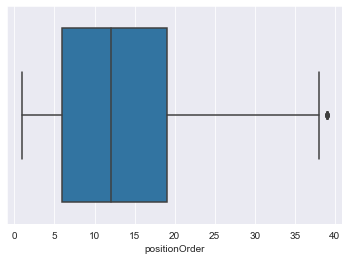

In [18]:
# Boxplot 
sns.boxplot(y);

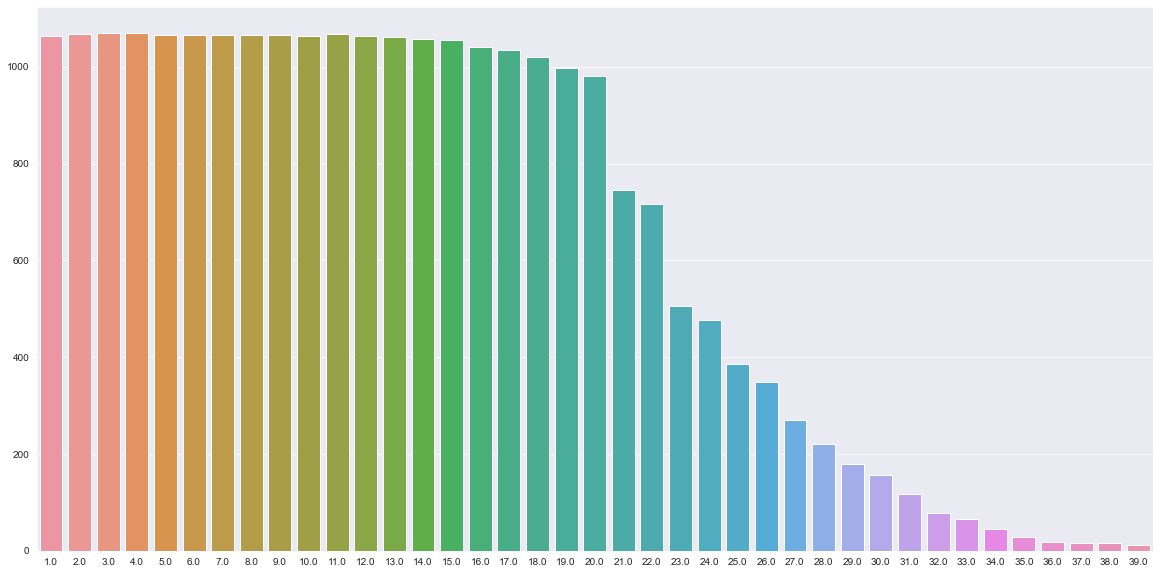

In [19]:
# Plot y distribution
y_distribution = y.value_counts()

# object_dtypes = data.columns[data.dtypes == object].values
plt.figure(figsize= (20,10))
sns.barplot (x = y_distribution.index, y = y_distribution.values);

In [20]:
# Binning y into three classes
def rank_mapper(y):
    if int(y) <= 7: return 1
    elif 7 < int(y) <= 16: return 2
    else: return 3

In [21]:
y = y.apply(rank_mapper)

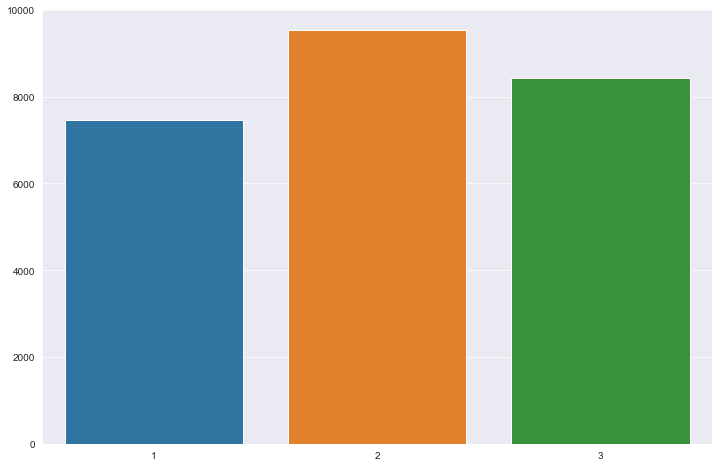

In [22]:
# Plot the classes to check balanced
y_distribution = y.value_counts()
# object_dtypes = data.columns[data.dtypes == object].values

plt.figure(figsize= (12,8))
sns.barplot (x = y_distribution.index, y = y_distribution.values);

In [23]:
y.value_counts()

2    9546
3    8441
1    7473
Name: positionOrder, dtype: int64

In [24]:
#Begin scaling and training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)



std = StandardScaler().fit(X_train)
# transform train data
x_train_std = std.transform(X_train)
# transform test data
x_test_std = std.transform(X_test)

x_train_std.shape

(19095, 9)

In [25]:
x_train_std[100:105], y[100:105]

(array([[-0.89071911, -0.44117922, -0.58161998,  0.38530397, -0.44887678,
          0.03919079, -0.57769803, -0.56311672, -0.4857126 ],
        [ 0.19773855,  2.49048315, -0.64901627,  0.10982408,  0.53761876,
          1.38805181, -0.57769803, -0.56311672, -0.17924704],
        [ 1.24036641, -0.71075737, -1.05339405, -1.40531536, -0.44887678,
         -0.77012582, -0.57769803, -0.56311672, -0.40909621],
        [ 0.38869603, -0.23899561, -0.64901627, -1.26757542, -0.44887678,
          0.81478587, -0.57769803, -0.56311672, -0.56232899],
        [ 0.38869603,  2.27145091, -0.85120516, -0.57887567, -0.44887678,
         -0.06197379, -0.57769803, -0.56311672, -0.29417163]]),
 100    2
 101    2
 102    2
 103    2
 104    3
 Name: positionOrder, dtype: int64)

In [26]:
lr = LogisticRegression(solver='sag', multi_class = "multinomial")
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
sgd = SGDClassifier()
gb = GaussianNB()

In [27]:
li = [lr,dt, rn, knn, sgd, gb]
all_predictions = pd.DataFrame()
dic = {}
for i in li:
    i.fit(x_train_std,y_train)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,y_test)*100)
    dic.update({str(i):i.score(x_test_std,y_test)*100})
    all_predictions[str(i)] = ypred

LogisticRegression(multi_class='multinomial', solver='sag') : 83.00078554595444
DecisionTreeClassifier() : 80.8955223880597
RandomForestClassifier() : 86.15868028279654
KNeighborsClassifier() : 81.9795758051846
SGDClassifier() : 82.40377062058131
GaussianNB() : 62.38805970149254


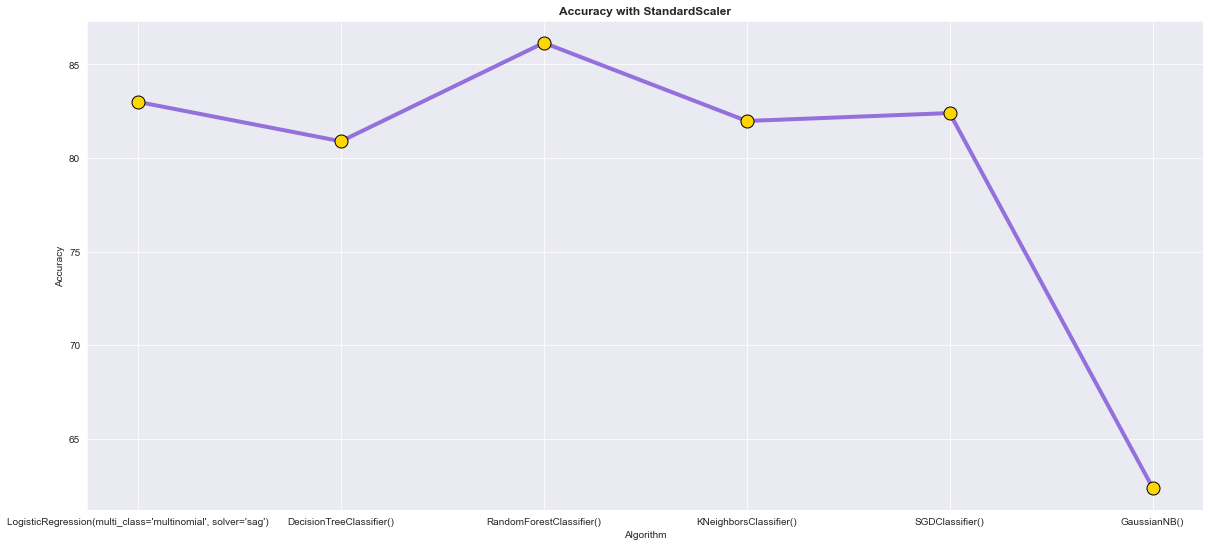

In [28]:
plt.figure(figsize=(20, 9))
plt.title("Accuracy with StandardScaler", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()

In [29]:
# Drop GaussianNB
lr = LogisticRegression(solver='sag', multi_class = "multinomial")
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
sgd = SGDClassifier()

In [30]:
li = [lr,dt, rn, knn, sgd]
all_predictions = pd.DataFrame()
dic = {}
for i in li:
    i.fit(x_train_std,y_train)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,y_test)*100)
    dic.update({str(i):i.score(x_test_std,y_test)*100})
    all_predictions[str(i)] = ypred

LogisticRegression(multi_class='multinomial', solver='sag') : 83.00078554595444
DecisionTreeClassifier() : 80.92694422623723
RandomForestClassifier() : 86.15868028279654
KNeighborsClassifier() : 81.9795758051846
SGDClassifier() : 82.34092694422624


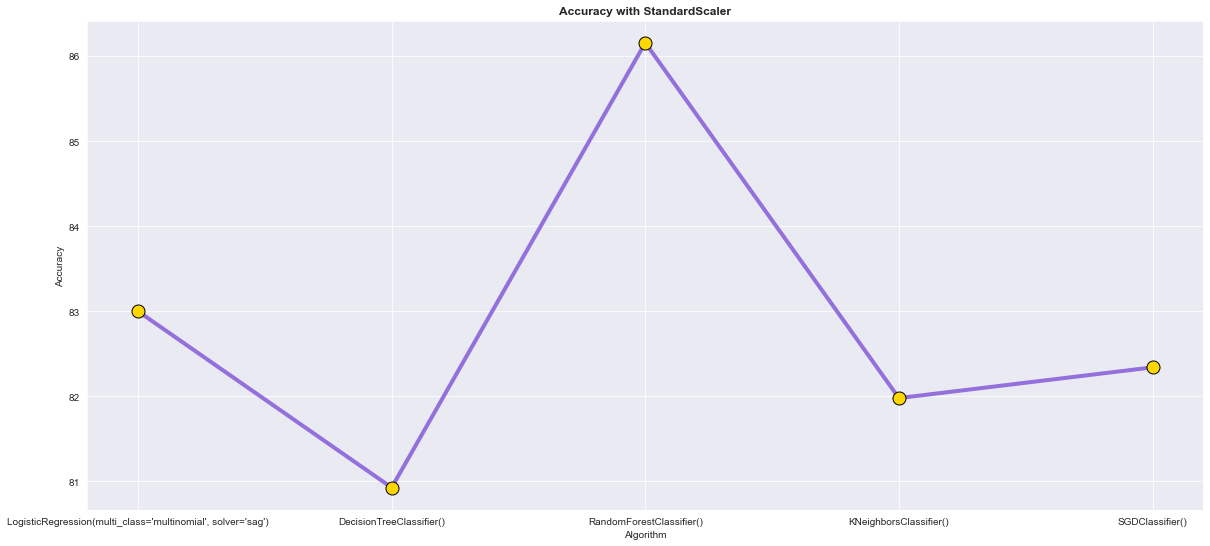

In [31]:
plt.figure(figsize=(20, 9))
plt.title("Accuracy with StandardScaler", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()

In [32]:
# Fit the highest accury model RandomForest 
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
rn.fit(x_train_std,y_train)
print(classification_report(y_test,rn.predict(x_test_std)))

              precision    recall  f1-score   support

           1       0.97      0.90      0.93      1868
           2       0.80      0.84      0.82      2387
           3       0.85      0.84      0.85      2110

    accuracy                           0.86      6365
   macro avg       0.87      0.86      0.87      6365
weighted avg       0.86      0.86      0.86      6365



In [33]:
# Stack all model predictions average 
stacked_model_predictions = all_predictions.mean(axis=1).apply(int)
stacked_model_predictions

0       1
1       1
2       3
3       1
4       1
       ..
6360    1
6361    2
6362    2
6363    1
6364    1
Length: 6365, dtype: int64

In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
print(classification_report(y_test,stacked_model_predictions))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89      1868
           2       0.70      0.83      0.76      2387
           3       0.92      0.65      0.76      2110

    accuracy                           0.80      6365
   macro avg       0.82      0.81      0.80      6365
weighted avg       0.82      0.80      0.80      6365



In [35]:
all_predictions 

,"LogisticRegression(multi_class='multinomial', solver='sag')",DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SGDClassifier()
0,2,1,1,2,2
1,1,1,1,1,1
2,3,3,3,3,3
3,1,2,2,2,2
4,1,2,2,2,1
...,...,...,...,...,...
6360,1,1,1,1,1
6361,3,2,3,3,3
6362,2,2,2,2,2
6363,1,1,1,1,1
